Code to warm up kernel

In [30]:
#Imports
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from pytrends.request import TrendReq
from arch import arch_model
#Declare constants
ETH_TICKER = "ETH-USD"
SPX_TICKER = "^GSPC" 
BTC_TICKER = "BTC-USD"


Below is the code to get data for:

Ether Vs S&P 500 data!

&

BTC Vs S&P 500 data!

In [2]:

START_DATE = "2022-01-01"

def clean_index(df):
    """Safely normalizes index and removes timezone if it exists."""
    df.index = df.index.normalize()
    if df.index.tz is not None:
        df.index = df.index.tz_localize(None)
    return df

# --- FETCH ETH DATA ---
# ETH trades 24/7, so this will be your primary (left) dataset
eth_data = yf.Ticker(ETH_TICKER).history(start=START_DATE, period="3y")
df_eth = eth_data[['Open', 'High', 'Low', 'Close','Volume']].copy()
df_eth = clean_index(df_eth)
    

df_combined_daily_eth = df_eth


    
# Display final data types and non-null counts
print("\n--- Final DataFrame Info ---")
df_combined_daily_eth.info()


--- Final DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2022-01-01 to 2024-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1096 non-null   float64
 1   High    1096 non-null   float64
 2   Low     1096 non-null   float64
 3   Close   1096 non-null   float64
 4   Volume  1096 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 51.4 KB


In [3]:
START_DATE = "2022-01-01"

def clean_index(df):
    """Safely normalizes index and removes timezone if it exists."""
    df.index = df.index.normalize()
    if df.index.tz is not None:
        df.index = df.index.tz_localize(None)
    return df

try:
    # --- FETCH BTC DATA ---
    # BTC trades 24/7, so this will be your primary (left) dataset
    btc_data = yf.Ticker(BTC_TICKER).history(start=START_DATE, period="3y")
    df_btc = btc_data[['Open', 'High', 'Low', 'Close','Volume']].copy()
    df_btc = clean_index(df_btc)
    

    df_combined_daily_btc = df_btc
        
except Exception as e:
    print(f"An error occurred while fetching data: {e}")
    exit()

# Display final data types and non-null counts
print("\n--- Final DataFrame Info ---")
df_combined_daily_btc.info()


--- Final DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2022-01-01 to 2024-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1096 non-null   float64
 1   High    1096 non-null   float64
 2   Low     1096 non-null   float64
 3   Close   1096 non-null   float64
 4   Volume  1096 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 51.4 KB


BTC HASHRATE + Fear & Greed index ~

All using dataset

In [4]:
FILE_PATH = "C:\\Users\\Kevin Ivander\\Documents\\GitHub\\DSC101\\csv_files\\hashrateBTC.csv"
START_DATE = '2022-01-01 00:00:00'
END_DATE = '2024-12-31 00:00:00'

df_hashrate_data = pd.read_csv(
    FILE_PATH,
    sep=';',
    names = ['DateTime', 'Hashrate'],
    index_col='DateTime',
    parse_dates=['DateTime'],
    skiprows=1, 
    header=None
    )
df_hashrate = df_hashrate_data.loc[START_DATE:END_DATE].copy()


df_hashrate.index = pd.to_datetime(df_hashrate.index)

df_hashrate['Hashrate'] = pd.to_numeric(df_hashrate['Hashrate'].astype(float))
daily_avg_hash = df_hashrate.resample('D').mean()
print("successfully extracted hashrate data")

df_combined_daily_btc.head()


successfully extracted hashrate data


,Open,High,Low,Close,Volume
Date,,,,,
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,24582667004
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,27951569547
2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,33071628362
2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219,42494677905
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,36851084859


In [5]:
import pandas as pd
FILE_PATH_FG = r'C:\Users\Kevin Ivander\Documents\GitHub\DSC101\csv_files\btc_with_fgi_4h.csv'
START_DATE = '2023-01-01 00:00:00'
END_DATE = '2024-12-31 00:00:00'
df_fng_data = pd.read_csv(
    FILE_PATH_FG,
    sep=',',
    index_col='timestamp',
    )
df_fng_data.index = pd.to_datetime(df_fng_data.index)                                   
df_fng_data.head()


,open,close,high,low,Fear & Greed Index,Fear & Greed Classification
timestamp,,,,,,
2025-10-02 04:00:00,118931.0,118774.0,119400.0,118439.0,64.0,Greed
2025-10-02 00:00:00,117403.0,118503.0,118503.0,117282.0,64.0,Greed
2025-10-01 20:00:00,117484.0,117481.0,118007.0,116853.0,49.0,Neutral
2025-10-01 16:00:00,116801.0,117392.0,117573.0,116435.0,49.0,Neutral
2025-10-01 12:00:00,114544.0,116644.0,116652.0,114544.0,49.0,Neutral


In [6]:
df_fng_data.drop(['open','close','high','low','Fear & Greed Classification'], axis=1, inplace=True)
df_fng_data.fillna(method='ffill', inplace=True)

C:\Users\Kevin Ivander\AppData\Local\Temp\ipykernel_12516\786426176.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fng_data.fillna(method='ffill', inplace=True)


Google Trends data!

In [7]:
import pandas as pd
df_gtrends_daily = pd.read_csv(r'C:\Users\Kevin Ivander\Documents\GitHub\DSC101\csv_files\google_trends_daily_20251211.csv')
df_gtrends_daily['date'] = pd.to_datetime(df_gtrends_daily['date'])
df_gtrends_daily.set_index('date', inplace=True)
df_gtrends_daily.head()

,GTrends_BTC,GTrends_ETH
date,,
2022-01-01,45,12
2022-01-02,61,15
2022-01-03,61,15
2022-01-04,61,15
2022-01-05,61,15


In [8]:
df_gtrends_eth = df_gtrends_daily['GTrends_ETH'].copy()
df_gtrends_eth.head()

date
2022-01-01    12
2022-01-02    15
2022-01-03    15
2022-01-04    15
2022-01-05    15
Name: GTrends_ETH, dtype: int64

In [9]:
df_gtrends_btc = df_gtrends_daily['GTrends_BTC'].copy()
df_gtrends_btc.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1094 entries, 2022-01-01 to 2024-12-29
Series name: GTrends_BTC
Non-Null Count  Dtype
--------------  -----
1094 non-null   int64
dtypes: int64(1)
memory usage: 17.1 KB


Sychronizing and Scaling

In [10]:
#BTC
df_combined_daily_btc = df_combined_daily_btc.join(df_fng_data)
df_combined_daily_btc = df_combined_daily_btc.join(daily_avg_hash)
df_combined_daily_btc = df_combined_daily_btc.join(df_gtrends_btc)
#ETH
df_combined_daily_eth = df_combined_daily_eth.join(df_fng_data)
df_combined_daily_eth = df_combined_daily_eth.join(df_gtrends_eth)

In [11]:

# Convert raw HashRate to Exahashes (EH/s) by dividing by 10^18 and volume into bilions
df_combined_daily_btc['Volume'] = df_combined_daily_btc['Volume'] / 1e10
df_combined_daily_eth['Volume'] = df_combined_daily_eth['Volume'] / 1e10
df_combined_daily_btc['Hashrate'] = df_combined_daily_btc['Hashrate'] / 1e18

# Rename the column so you don't forget the unit later
df_combined_daily_btc.rename(columns={'Hashrate': 'Hashrate_EH'}, inplace=True)
df_combined_daily_btc.rename(columns={'Volume': 'Volume (Bilions)'}, inplace=True)
df_combined_daily_eth.rename(columns={'Volume': 'Volume (Bilions)'}, inplace=True)
print(df_combined_daily_btc.head().to_markdown())
print(df_combined_daily_eth.head().to_markdown())


| Date                |    Open |    High |     Low |   Close |   Volume (Bilions) |   Fear & Greed Index |   Hashrate_EH |   GTrends_BTC |
|:--------------------|--------:|--------:|--------:|--------:|-------------------:|---------------------:|--------------:|--------------:|
| 2022-01-01 00:00:00 | 46311.7 | 47827.3 | 46288.5 | 47686.8 |            2.45827 |                   21 |       207.532 |            45 |
| 2022-01-02 00:00:00 | 47680.9 | 47881.4 | 46856.9 | 47345.2 |            2.79516 |                   29 |       190.64  |            61 |
| 2022-01-03 00:00:00 | 47343.5 | 47510.7 | 45836   | 46458.1 |            3.30716 |                   29 |       168.922 |            61 |
| 2022-01-04 00:00:00 | 46458.9 | 47406.5 | 45752.5 | 45897.6 |            4.24947 |                   23 |       177.368 |            61 |
| 2022-01-05 00:00:00 | 45899.4 | 46929   | 42798.2 | 43569   |            3.68511 |                   24 |       180.988 |            61 |
| Date              

In [12]:
print("For ETH:")
df_combined_daily_eth.info()
print("For BTC:")
df_combined_daily_btc.info()

For ETH:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2022-01-01 to 2024-12-31
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                1096 non-null   float64
 1   High                1096 non-null   float64
 2   Low                 1096 non-null   float64
 3   Close               1096 non-null   float64
 4   Volume (Bilions)    1096 non-null   float64
 5   Fear & Greed Index  1096 non-null   float64
 6   GTrends_ETH         1094 non-null   float64
dtypes: float64(7)
memory usage: 68.5 KB
For BTC:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2022-01-01 to 2024-12-31
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                1096 non-null   float64
 1   High                1096 non-null   float64
 2   Low                 1096 non-null   float64
 3   Cl

START OF LEARNING MODEL

In [42]:
from pmdarima import auto_arima
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


In [15]:
#Training & Testing for BTC model

target = df_combined_daily_btc['Close']
b = df_combined_daily_btc[['Open','High','Low','Volume (Bilions)','Fear & Greed Index','Hashrate_EH','GTrends_BTC']]

train_size = len(target) - 90
b_train, b_test  = b[:train_size], b[train_size:]
target_train, target_test = target.iloc[:train_size], target[train_size:]

print(f"Training data points: {len(target_train)}")
print(f"Testing data points: {len(target_test)}")


Training data points: 1006
Testing data points: 90


In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    # The null hypothesis of the ADF test is that the series is non-stationary.
    # If p-value is <= 0.05, we reject the null hypothesis and say the series is stationary.
    if result[1] <= 0.05:
        print("Series is stationary.")
    else:
        print("Series is NON-stationary. Differencing is likely required.")

print("Checking Stationarity of BTC Close Price:")
check_stationarity(target_train)


Checking Stationarity of BTC Close Price:
ADF Statistic: -0.6613865191462805
p-value: 0.8564994401709313
Series is NON-stationary. Differencing is likely required.


In [18]:
model = auto_arima(       target_train, 
                          exogenous=b_train,
                          start_p=1, start_q=1,
                          max_p=3, max_q=3,
                          m=1,
                          start_P=0, seasonal=False, 
                          d=None, D=0, 
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)
print(model.summary())
best_order = model.order
best_season_order = model.seasonal_order
print(f"Best ARIMA order: {best_order}")

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17041.026, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17040.401, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17039.379, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17039.494, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17038.525, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.204 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1006
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -8518.263
Date:                Thu, 11 Dec 2025   AIC                          17038.525
Time:                        18:13:07   BIC                          17043.438
Sample:                    01-01-2022   HQIC                         17040.392
                         - 10-02-2024                                  

In [28]:
model = SARIMAX(target_train, 
                exog=b_train, 
                order=(1,1,1), 
                seasonal_order=best_season_order, 
                enforce_stationarity=False, 
                enforce_invertibility=False)

results = model.fit(disp=False)
print(results.summary())

c:\Users\Kevin Ivander\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Kevin Ivander\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1006
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -7543.058
Date:                Thu, 11 Dec 2025   AIC                          15106.116
Time:                        18:56:52   BIC                          15155.223
Sample:                    01-01-2022   HQIC                         15124.777
                         - 10-02-2024                                         
Covariance Type:                  opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Open                  -0.5796      0.021    -28.076      0.000      -0.620      -0.539
High                   0.8293      0.028     30.077      0.000       0.775       0.883
Low                 

c:\Users\Kevin Ivander\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:
sarimax_results = model.fit(disp=False)
sarimax_residuals = sarimax_results.resid
print(f"Residuals length: {len(sarimax_residuals)}")

Residuals length: 1006


c:\Users\Kevin Ivander\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
print("\nChecking Stationarity of SARIMAX Residuals:")
adf_resid_result = adfuller(sarimax_residuals)
print(f"ADF Residual p-value: {adf_resid_result[1]:.4f}")

if adf_resid_result[1] <= 0.05:
    print("Residuals are stationary (Required for GARCH).")
else:
    print("WARNING: Residuals are NOT stationary. Review SARIMAX parameters.")


Checking Stationarity of SARIMAX Residuals:
ADF Residual p-value: 0.0000
Residuals are stationary (Required for GARCH).


In [31]:
garch_model = arch_model(sarimax_residuals, 
                         vol='GARCH', 
                         p=1, q=1,
                         mean='Zero', # Mean is Zero because SARIMAX already modeled the mean
                         dist='StudentsT')
garch_results = garch_model.fit(update_freq = 5, disp='off')
print("\n--- GARCH(1, 1) Model Summary on SARIMAX Residuals ---")
print(garch_results.summary())


--- GARCH(1, 1) Model Summary on SARIMAX Residuals ---
                          Zero Mean - GARCH Model Results                           
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.001
Vol Model:                            GARCH   Log-Likelihood:               -7304.67
Distribution:      Standardized Student's t   AIC:                           14617.3
Method:                  Maximum Likelihood   BIC:                           14637.0
                                              No. Observations:                 1006
Date:                      Thu, Dec 11 2025   Df Residuals:                     1006
Time:                              18:58:15   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------

c:\Users\Kevin Ivander\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\arch\univariate\base.py:694: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.857e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  self._check_scale(resids)


In [ ]:
# We will use the copy of X_test for cleaning
X_test = b_test.copy() # Use the name from your image if that is what you used for the split
y_test = target_test # Use the name from your image

forecast_horizon = len(y_test) 
z_score = 1.96

print(f"Starting Data Cleaning for Exogenous Test Set (X_test)...")


X_test_clean = X_test.fillna(method='ffill') 


if X_test_clean.isnull().sum().sum() == 0:
    print("SUCCESS: X_test is now fully clean (no NaNs or infs detected).")
else:
    print("WARNING: Missing values still exist. Check data source.")
    


Starting Data Cleaning for Exogenous Test Set (X_test)...
SUCCESS: X_test is now fully clean (no NaNs or infs detected).
--------------------------------------------------


C:\Users\Kevin Ivander\AppData\Local\Temp\ipykernel_12516\4015347725.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_test_clean = X_test.fillna(method='ffill')


In [ ]:
forecast_horizon = len(y_test) 

z_score = 1.96 # Standard Z-score for 95% Confidence Interval
sarimax_forecast = sarimax_results.forecast(steps=forecast_horizon, exog=X_test_clean)
sarimax_forecast.index = target_test.index

garch_forecast = garch_results.forecast(horizon=forecast_horizon)

predicted_variance = garch_forecast.variance.iloc[-1]
predicted_volatility = np.sqrt(predicted_variance)
predicted_volatility.index = target_test.index

forecast_df = pd.DataFrame({
    'Actual_Price': target_test,
    'Price_Forecast': sarimax_forecast,
    'Volatility_Forecast': predicted_volatility,
    'Lower_Bound_95': sarimax_forecast - z_score * predicted_volatility,
    'Upper_Bound_95': sarimax_forecast + z_score * predicted_volatility,
})






--- FORECAST PERFORMANCE METRIC ---
Root Mean Squared Error (RMSE) over 90 days: 822.75

--- FIRST 5 DAYS OF ACTUAL VS. FORECAST ---
            Actual_Price  Price_Forecast  Volatility_Forecast  Lower_Bound_95  \
Date                                                                            
2024-10-03      60759.40        60879.14               568.64        59764.60   
2024-10-04      62067.48        61950.98               568.88        60835.98   
2024-10-05      62089.95        61855.71               569.12        60740.24   
2024-10-06      62818.95        62451.02               569.35        61335.09   
2024-10-07      62236.66        63639.11               569.59        62522.71   

            Upper_Bound_95  
Date                        
2024-10-03        61993.67  
2024-10-04        63065.98  
2024-10-05        62971.17  
2024-10-06        63566.95  
2024-10-07        64755.50  


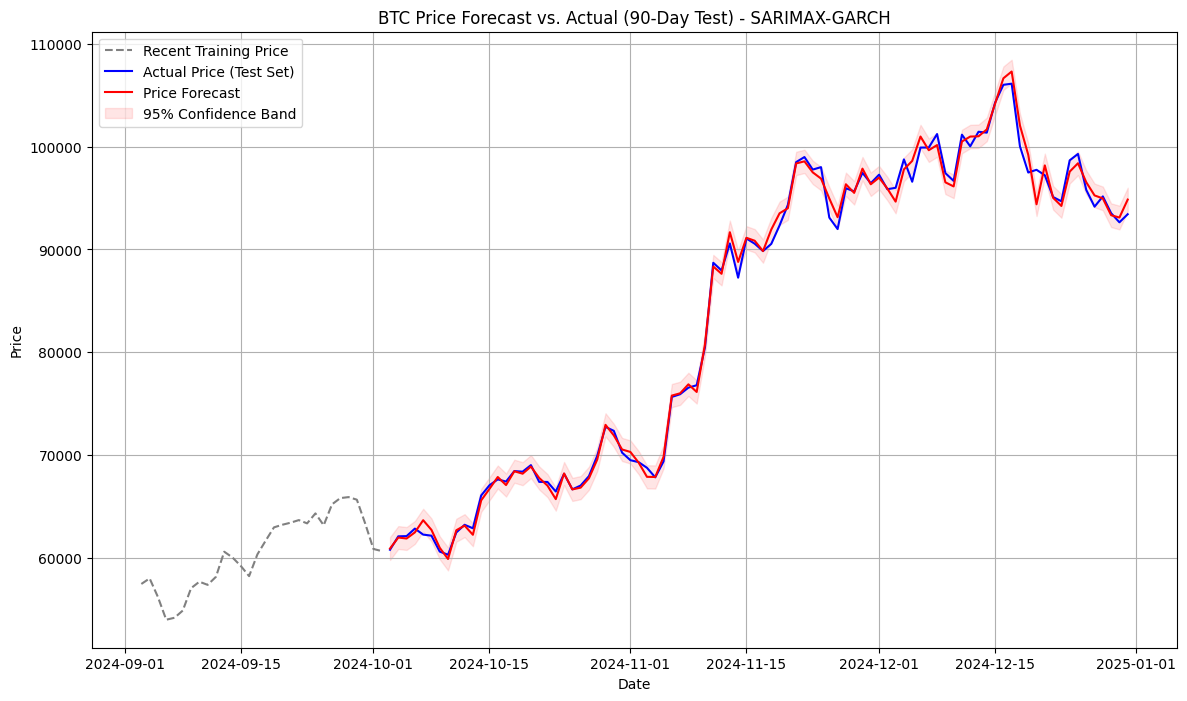

In [44]:
rmse = np.sqrt(mean_squared_error(y_test, sarimax_forecast))


print("\n--- FORECAST PERFORMANCE METRIC ---")
print(f'Root Mean Squared Error (RMSE) over 90 days: {rmse:,.2f}')
print("\n--- FIRST 5 DAYS OF ACTUAL VS. FORECAST ---")
print(forecast_df.head().round(2))

plt.figure(figsize=(14, 8))
# Plot last 30 days of training data for context
plt.plot(target_train.iloc[-30:], label='Recent Training Price', color='grey', linestyle='--') 
# Plot the actual price movement in the test set
plt.plot(y_test.index, y_test, label='Actual Price (Test Set)', color='blue') 
# Plot the model's prediction
plt.plot(forecast_df.index, forecast_df['Price_Forecast'], label='Price Forecast', color='red')
# Plot the dynamic confidence band
plt.fill_between(forecast_df.index, 
                 forecast_df['Lower_Bound_95'], 
                 forecast_df['Upper_Bound_95'], 
                 color='red', alpha=0.1, label='95% Confidence Band')

plt.title(f'BTC Price Forecast vs. Actual ({forecast_horizon}-Day Test) - SARIMAX-GARCH')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()